In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.decomposition import PCA
import numpy as np

%matplotlib inline

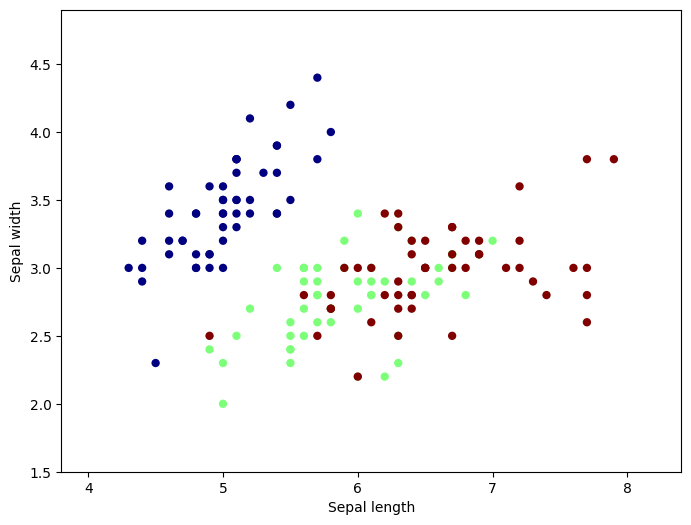

In [2]:
iris = datasets.load_iris()
#take the first two features.
X = iris.data[:, :2]  
y = iris.target

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

plt.figure(2, figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.jet,edgecolor='none')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

plt.show()

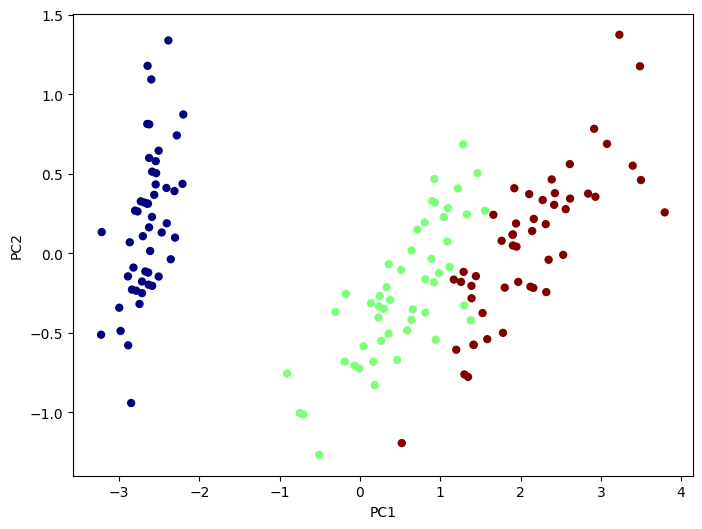

In [3]:
X_reduced = PCA(n_components=2).fit_transform(iris.data)

plt.figure(2, figsize=(8, 6))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, cmap=plt.cm.jet,edgecolor='none')
plt.xlabel('PC1')
plt.ylabel('PC2')

plt.show()

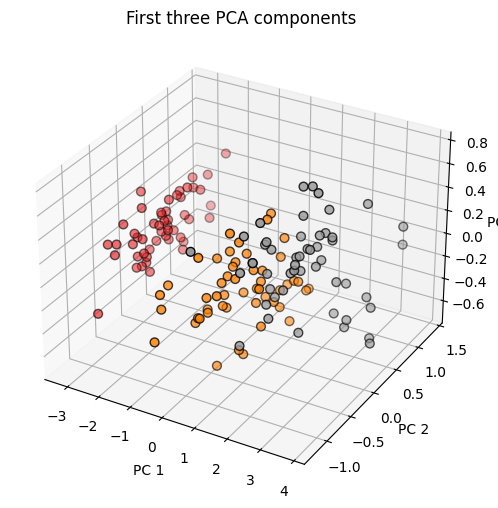

In [4]:
# To getter a better understanding of interaction of the dimensions
# plot the first three PCA dimensions
fig = plt.figure(1, figsize=(8, 6))
ax = fig.add_subplot(1, 1,1, projection='3d')
X_reduced = PCA(n_components=3).fit_transform(iris.data)
ax.scatter(X_reduced[:, 0], 
          X_reduced[:, 1], X_reduced[:, 2], c=y,
           cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title("First three PCA components")
ax.set_xlabel('PC 1')
ax.set_ylabel('PC 2')
ax.set_zlabel('PC 3')
plt.show()

# Use a higher dimensonal dataset like MNIST
## 64 features (pixels)

In [5]:
digits = datasets.load_digits()
digits.data.shape

(1797, 64)

In [6]:
pca = PCA(2)  # project from 64 to 2 dimensions
projected = pca.fit_transform(digits.data)
print(digits.data.shape)
print(projected.shape)

(1797, 64)
(1797, 2)


In [7]:
evr = pca.explained_variance_ratio_
evr

array([0.14890594, 0.13618771])

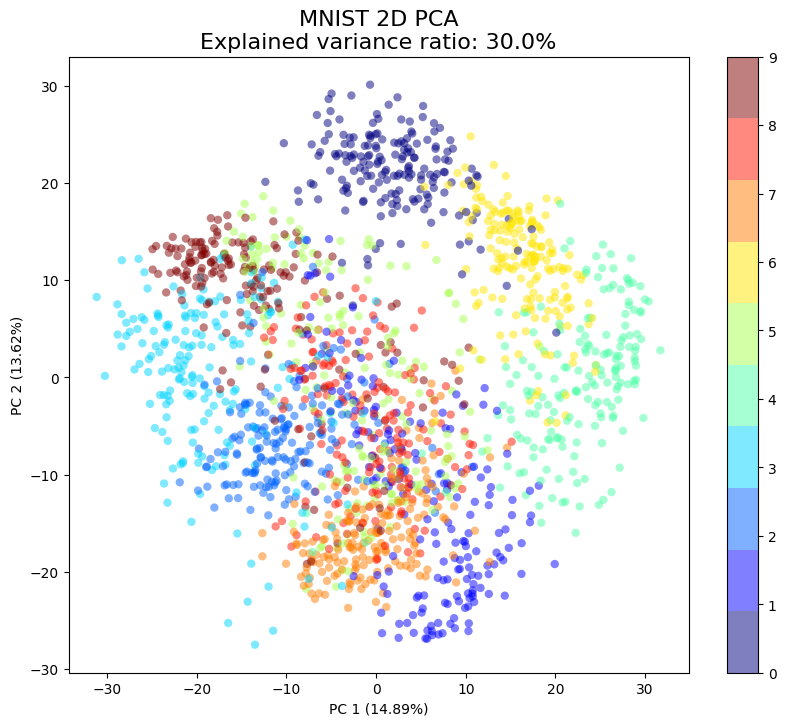

In [8]:
fig, ax = plt.subplots(figsize=(10,8))
cset = ax.scatter(projected[:, 0], projected[:, 1],
          c=digits.target, edgecolor='none', alpha=0.5,
          cmap=plt.cm.get_cmap('jet', 10))
ax.set_xlabel('PC 1 ({0}%)'.format(100*round(evr[0],4)))
ax.set_ylabel('PC 2 ({0}%)'.format(100*round(evr[1],4)))
ax.set_title('MNIST 2D PCA\nExplained variance ratio: {0}%'.format(100*round(sum(evr),1)),fontsize=16)
fig.colorbar(cset)
plt.show()

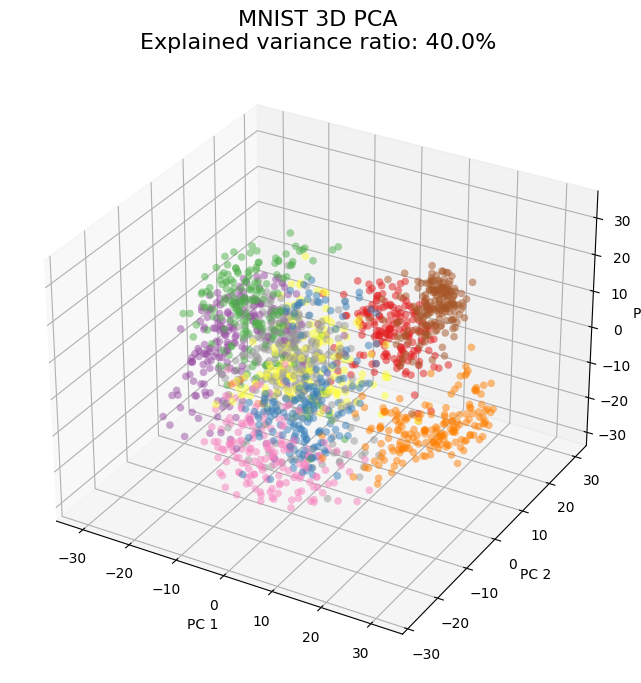

In [9]:
pca_3 = PCA(n_components=3)
X_reduced = pca_3.fit_transform(digits.data) 
evr = pca_3.explained_variance_ratio_

fig = plt.figure(1, figsize=(8, 8))
ax = fig.add_subplot(1, 1,1, projection='3d')

ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=digits.target,
           cmap=plt.cm.Set1, edgecolor='none', s=30, alpha=0.5)
ax.set_title('MNIST 3D PCA\nExplained variance ratio: {0}%'.format(100*round(sum(evr),2)),fontsize=16)
ax.set_xlabel('PC 1')
ax.set_ylabel('PC 2')
ax.set_zlabel('PC 3')


plt.show()

# How to choose how many PC are enough ?

In [10]:
def plot_pca(x,thresh=0.95):
    pca = PCA()
    pca.fit(x)

    cumsum = np.cumsum(pca.explained_variance_ratio_)
    d = np.argmax( cumsum >= thresh)+1

    fig,ax = plt.subplots(figsize=(12,5))
    ax.plot(cumsum,c='g', marker='o',markersize=2)
    ax.set_xlabel('PCA dimensions',fontsize=16)
    ax.set_ylabel('Explained variance ratio',fontsize=16)
    ax.axvline(d,c='r',ls='--',lw=1)
    ax.axhline(thresh+0.01,c='r',ls='--',lw=1)
    ax.grid(alpha=0.2)
    ax.text(d,0.15,str(d),fontsize=9)
    ax.set_title('Explained variance ratio vs PC dimensions',fontsize=16)
    ax.set_ylim(0,1.2)
    plt.show()

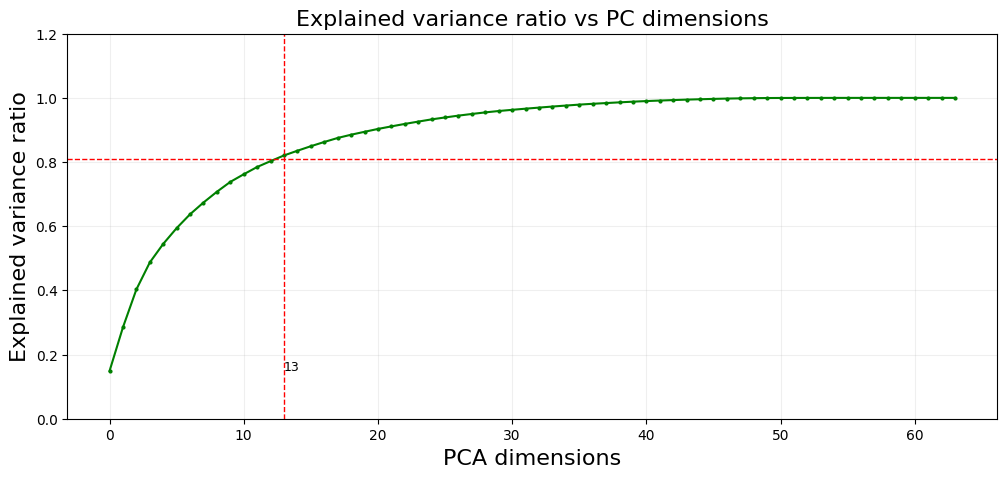

In [11]:
# MNIST dataset
plot_pca(digits.data,thresh=0.8)

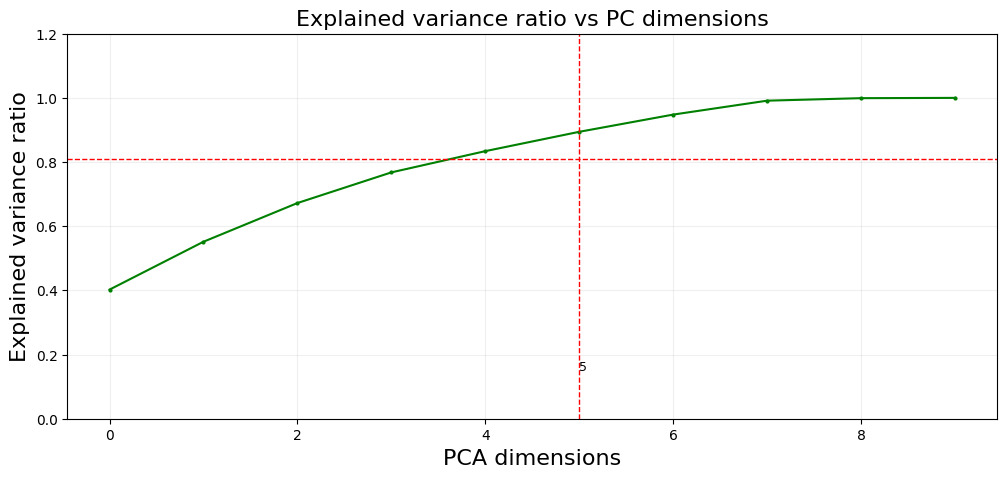

In [12]:
# diabetes dataset
diabetes = datasets.load_diabetes()
plot_pca(diabetes.data,thresh=0.8)

# Incremental PCA

In [13]:
from sklearn.decomposition import IncrementalPCA

n_batches = 100
n_components = 15
inc_pca = IncrementalPCA(n_components = n_components)

variance_values = []
for X_batch in np.array_split(digits.data, n_batches):
    inc_pca.partial_fit(X_batch)
    variance_values.append(inc_pca.explained_variance_ratio_)

print('PC variance_ratio for {0} components:'.format(n_components))
print(inc_pca.explained_variance_ratio_)
print()
print('Total variance ratio: {0}%'.format(round(100*sum(inc_pca.explained_variance_ratio_),2)))

PC variance_ratio for 15 components:
[0.14874709 0.13611293 0.11783724 0.08405417 0.05762614 0.04897546
 0.04268033 0.03622344 0.03333857 0.03058632 0.02340557 0.02215493
 0.01723612 0.01452475 0.0133627 ]

Total variance ratio: 82.69%


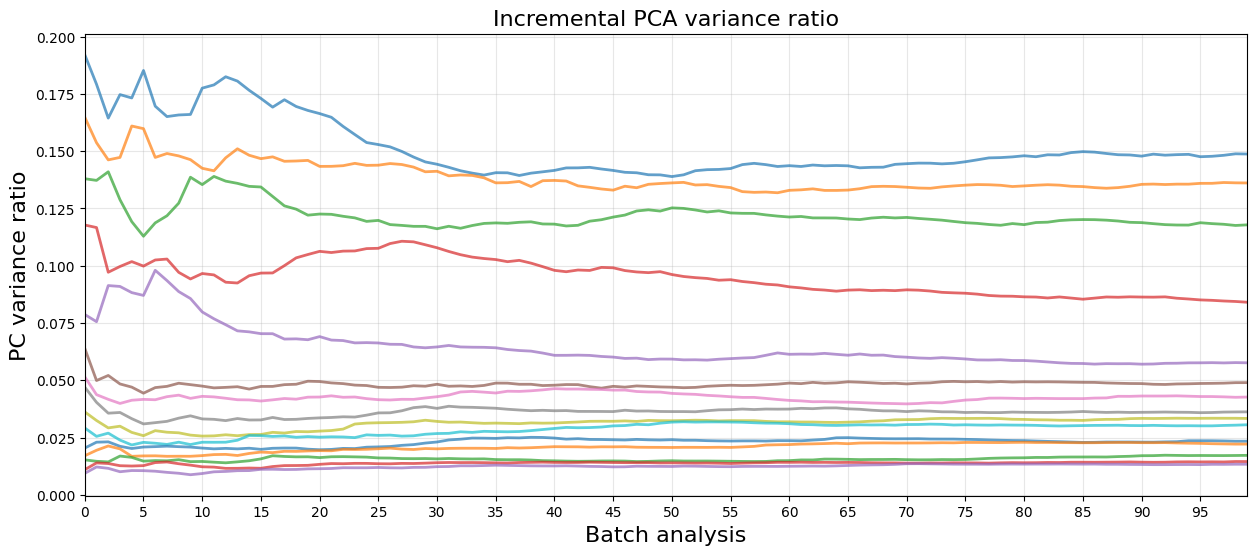

In [14]:
fig,ax = plt.subplots(figsize=(15,6))
ax.plot(variance_values,alpha=0.7,lw=2)  
ax.set_xlabel('Batch analysis',fontsize=16)
ax.set_ylabel('PC variance ratio',fontsize=16)
ax.set_title('Incremental PCA variance ratio',fontsize=16)
ax.grid(alpha=0.3)
ax.set_xlim(0,99)
ax.xaxis.set_ticks(np.arange(0, 100, 5))
plt.show()